In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
x = np.arange(-10, 10)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def d_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Here it is, the magic formula.

$$\xi = a_f - A \cdot \mathrm{sigmoid}(r_dx + b)$$

Where $A = a_f - a_d$.

Delivery altitude $a_d$, flying altitude $a_f$, descent rate parameter $r_d$, buffer parameter $b$, position $x$.

Setting $b$ to 9 seems to make sense.

In [11]:
def get_trajectory(x, r_d, a_f, a_d, b=9):
    return a_f - (a_f - a_d) * sigmoid(r_d*x + b)

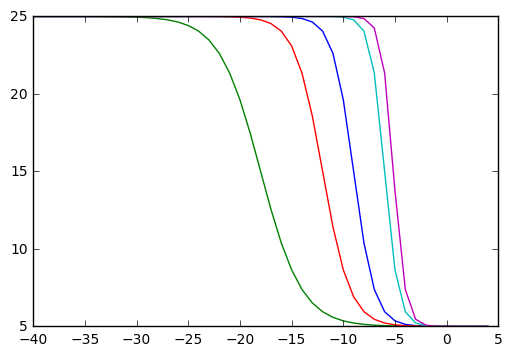

In [12]:
x = np.arange(-40, 5)
plt.plot(
    x, get_trajectory(x, 1.0, 25, 5),
    x, get_trajectory(x, 0.5, 25, 5),
    x, get_trajectory(x, 0.75, 25, 5),
    x, get_trajectory(x, 1.5, 25, 5),
    x, get_trajectory(x, 1.75, 25, 5),
)
plt.show()

In [21]:
x = np.arange(-20, 4, 5)
print x

[-20 -15 -10  -5   0]


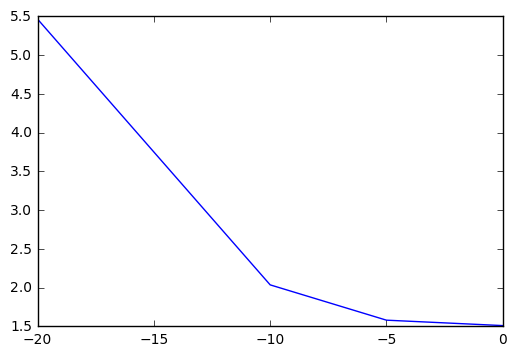

In [26]:
plt.plot(x, get_trajectory(x, 0.4, 6.0, 1.5, 6))
plt.show()